In [1]:
import glob

from pathlib import Path
from tqdm import tqdm

import annotation_utils

/home/ltindall/.pyenv/versions/3.10.9/envs/rfml-dev/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [1]:
s3_data = {
    "anom_wifi": [
        "data/gamutrf/gamutrf-nz-anon-wifi/*.sigmf-meta",
        "data/gamutrf/gamutrf-wifi-and-anom-bladerf/anom*.sigmf-meta"
    ],
    "wifi": [
        "data/gamutrf/gamutrf-nz-nonanon-wifi/*.sigmf-meta",
        "data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi*.sigmf-meta",
        "data/gamutrf/gamutrf-nz-wifi/*.sigmf-meta",
    ],
}
        

{'anom_wifi': ['data/gamutrf/gamutrf-nz-anon-wifi/*.sigmf-data', 'data/gamutrf/gamutrf-wifi-and-anom-bladerf/anom*.sigmf-data'], 'wifi': ['data/gamutrf/gamutrf-nz-nonanon-wifi/*.sigmf-data', 'data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi*.sigmf-data', 'data/gamutrf/gamutrf-nz-wifi/*.sigmf-data']}


  0%|                                                                                     | 0/1 [00:00<?, ?it/s]/home/ltindall/.pyenv/versions/3.10.9/envs/rfml-dev/lib/python3.10/site-packages/sigmf/sigmffile.py:914: UserWarning: Compliant Dataset `data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/anomwifi-encoding-0-sendsps-10000000.s16.zst.sigmf-data` exists but "core:dataset" is also defined; using `data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/anomwifi-encoding-0-sendsps-10000000.s16.zst.sigmf-data`
  warnings.warn(f'Compliant Dataset `{compliant_data_fn}` exists but '



Loaded 
 Data file: data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/anomwifi-encoding-0-sendsps-10000000.s16.zst.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/anomwifi-encoding-0-sendsps-10000000.s16.zst.sigmf-meta

np.max(avg_pwr_db)=-52.91095836544167
np.mean(avg_pwr_db)=-63.19792321336329
median absolute deviation threshold = -61.74815892865216
using threshold = -61.74815892865216


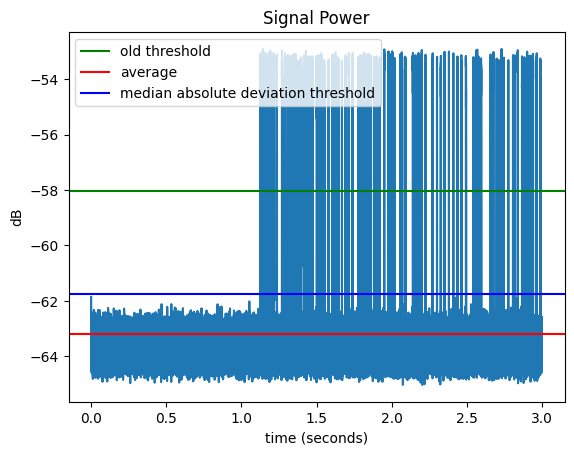


100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:46<00:00, 46.92s/it]

Writing 904 annotations to data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/anomwifi-encoding-0-sendsps-10000000.s16.zst.sigmf-meta


In [3]:
for label in s3_data:
    for data_glob in s3_data[label]:
        for f in tqdm(glob.glob(str(Path(data_glob)))):
            annotation_utils.annotate(f, label=label, avg_window_len=256, avg_duration=3, debug=True)